In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import math
from numpy import *

import matplotlib
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_predict, cross_validate

In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import sklearn.metrics as metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz

from collections import Counter

In [15]:
planets = pd.read_csv('1-3mm & np notma.csv', skipinitialspace=True)

fates = list(set(planets['fate']))

types = {fates[i] : i for i in range(len(fates))}

classes = []

for i in range(len(planets['fate'])):
    if planets['fate'][i] == "remaining":
        classes += [0]
    else:
        classes += [1]
        
classes = np.array(classes)

runs=np.array(list(set(planets['run'].to_numpy())))

runs_train, runs_test, _,_ = train_test_split(runs.T, np.ones_like(runs).T, test_size=0.3, random_state=4) 

features_train=planets.query('run in @runs_train') # find the features where run in runs_train
features_test=planets.query('run in @runs_test')

ru = features_test['run'].to_numpy()
pl = features_test['planet'].to_numpy()
et = features_test['end time'].to_numpy()
fa = features_test['fate'].to_numpy()

classes_test=(et<1E7)*1

ru2 = features_train['run'].to_numpy()
p2 = features_train['planet'].to_numpy()
et2 = features_train['end time'].to_numpy()
fa2 = features_train['fate'].to_numpy()

classes_train=(et2<1E7)*1


d = ['run', 'planet', 'fate', 'end time', 'sd i', 'mean log mratio mm2', 'final mhr mm1', 'mean log mratio mm1', 
     'max log mratio mm2', 'sd pericenter', 'cv a', 'cv pericenter', 'min log mratio mm1', 'final log mratio mm2', 
     'max log mratio mm3', 'min log mratio npo', 'initial mhr mm2', 'cv e', 'mean log mratio mm3',
     'sd log aratio npo', 'max mhr mm1', 'max log mratio mm1', 'final log mratio mm3', 'min log mratio mm2', 
     'sd mhr npo', 'max log aratio mm3', 'max log mratio npo', 'max mhr mm2', 'mean mhr mm3', 'mean e', 
     'max mhr npo', 'initial mhr mm3', 'mean log mratio npi', 'mean mhr mm2', 'max mhr npi', 'max log aratio npi', 
     'sd jacobi', 'min mhr mm1', 'initial i', 'sd mhr npi', 'max jacobi', 'max log aratio mm2', 'final mhr mm2',
     'final log mratio mm1', 'mean log mratio npo', 'final log mratio npo', 'min mhr npo', 'mean log aratio npo', 
     'min log mratio npi', 'mean pericenter', 'max log aratio mm1', 'final pericenter', 'final mhr npo', 
     'final log aratio npo', 'min mhr mm2', 'initial mhr mm1', 'min i', 'min pericenter', 'min log aratio npo', 
     'initial log aratio mm1', 'initial mhr npi', 'initial pericenter', 'initial e', 'initial log mratio npo', 
     'final log aratio mm3', 'sd log aratio npi', 'min log aratio npi', 'final log aratio mm1', 
     'max log mratio npi', 'final i', 'min e', 'mean mhr npo', 'initial log aratio mm2', 'final log mratio npi', 
     'final mhr mm3', 'initial log mratio npi', 'max i', 'initial log aratio npo', 'mean log aratio mm3', 
     'min log aratio mm2', 'mean mhr npi', 'initial mhr npo', 'max pericenter', 'mean jacobi', 
     'final log aratio mm2', 'mean log aratio mm1', 'initial log aratio npi', 'max mhr mm3', 'mean log aratio mm2',
     'min log aratio mm3', 'final e', 'final jacobi', 'min log aratio mm1', 'min jacobi', 'max log aratio npo', 
     'mean mhr mm1', 'min log mratio mm3', 'final log aratio npi', 'min mhr mm3', 'initial jacobi', 'mean i', 
     'min mhr npi', 'final mhr npi', 'initial log aratio mm3', 'mean log aratio npi', 'sd log mratio mm1', 
     'sd log mratio mm2', 'sd log mratio mm3', 'sd log mratio npi', 'sd log mratio npo']  
            
      
ids_train = features_train['planet'].to_numpy()
features_train.drop(d, axis=1, inplace=True)

cols = features_train.columns
features_train = features_train.to_numpy()

ids_test = features_test['planet'].to_numpy()
features_test.drop(d, axis=1, inplace=True)
features_test = features_test.to_numpy()


/Users/neha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
print([(x,Counter(fa)[x],Counter(fa)[x]/len(fa)) for x in Counter(fa)], len(fa))
print([(x,Counter(fa2)[x],Counter(fa2)[x]/len(fa2)) for x in Counter(fa2)], len(fa2))
print(Counter(planets['fate'].to_numpy()))


[('remaining', 88, 0.29333333333333333), ('central body collision', 37, 0.12333333333333334), ('ejected', 144, 0.48), ('planet-planet collision', 31, 0.10333333333333333)] 300
[('ejected', 344, 0.49142857142857144), ('remaining', 198, 0.28285714285714286), ('central body collision', 106, 0.15142857142857144), ('planet-planet collision', 52, 0.07428571428571429)] 700
Counter({'ejected': 488, 'remaining': 286, 'central body collision': 143, 'planet-planet collision': 83})


In [70]:
lr = []
ne = []
rs = []

val = 0.005
c = val
while c <= 0.08:
    lr.append(c)
    c += val
lr=[round(l,5) for l in lr]

val = 10
c = 70
while c <= 200:
    ne.append(c)
    c += val


param_grid = {'learning_rate': lr,
              'max_depth': [ 2, 3, 4, 5],
              'n_estimators': ne,
              'max_features': ['auto','sqrt','log2'],
              'random_state':[5,6,7]
              }
print(param_grid)

#feat=array(list(features_test)+list(features_train))
#clas=array(list(classes_test)+list(classes_train))

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, n_jobs=-1,refit = True, verbose=1,cv=5)
grid.fit(features_train, classes_train)

{'learning_rate': [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08], 'max_depth': [2, 3, 4, 5], 'n_estimators': [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [5, 6, 7]}
Fitting 5 folds for each of 8064 candidates, totalling 40320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 2227 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 2777 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 3427 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 4177 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 5027 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 5977 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 7027 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 8177 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 9427 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 10777 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 12227 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 13777 tasks  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
             param_grid={'learning_rate': [0.005, 0.01, 0.015, 0.02,

In [71]:
import pickle
with open('grid_search_final.pickle','wb') as p: pickle.dump(grid, p, protocol=pickle.HIGHEST_PROTOCOL)

foo=pd.DataFrame(grid.cv_results_)

fs=foo.sort_values('rank_test_score')
pd.set_option('display.width', None)
#print(fs)

print(grid.best_estimator_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.025, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='auto',
                           random_state=6, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [14]:
#classifier = grid.best_estimator_#
classifier=GradientBoostingClassifier(learning_rate = 0.025, max_depth = 3, max_features = 'sqrt', n_estimators = 130, random_state = 6)
classifier.fit(features_train,classes_train)
classes_predict = classifier.predict(features_test)
print(np.sum(classes_predict==classes_test)/len(classes_test))  
print(classification_report(classes_test, classes_predict))
# 2=86.7
# 3=83.3
# 4=88.3
# 5=87.6
# 6=84.7
# 7=88
# 8=85

0.86
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        85
           1       0.88      0.93      0.91       215

    accuracy                           0.86       300
   macro avg       0.84      0.80      0.82       300
weighted avg       0.86      0.86      0.86       300



In [5]:
print(metrics.classification_report(classes_test, classes_predict, digits=3))

              precision    recall  f1-score   support

           0      0.863     0.716     0.783        88
           1      0.890     0.953     0.920       212

    accuracy                          0.883       300
   macro avg      0.876     0.834     0.851       300
weighted avg      0.882     0.883     0.880       300



In [6]:
print(recall_score(classes_test, classes_predict))

0.9528301886792453


<Figure size 1080x504 with 0 Axes>

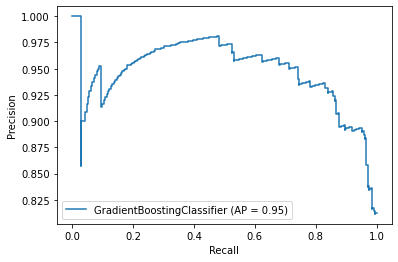

In [10]:
f=plt.figure(figsize=(15,7))

plot_precision_recall_curve(classifier, features_test, classes_test)

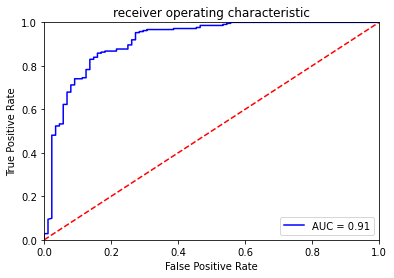

In [8]:
probs = classifier.predict_proba(features_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(classes_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('receiver operating characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

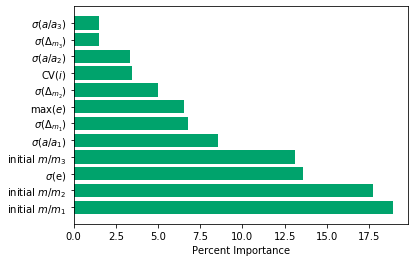

In [5]:
feats = classifier.feature_importances_
inds = np.argsort(feats)[::-1]

fig = plt.figure()


xdict = {'initial log mratio mm2':r'initial $m/m_2$', 
      'initial log mratio mm1':r'initial $m/m_1$', 
      'sd e':r'$\sigma(\mathrm{e})$', 
      'initial log mratio mm3':r'initial $m/m_3$', 
      'max e':r'$\max (e)$', 
      'sd log aratio mm1':r'$\sigma(a/a_1)$',
      'sd mhr mm1':r'$\sigma(\Delta_{m_1})$', 
      'sd mhr mm2':r'$\sigma(\Delta_{m_2})$', 
      'sd log aratio mm2':r'$\sigma(a/a_2)$', 
      'cv i':r'$\mathrm{CV}(i)$', 
      'sd mhr mm3':r'$\sigma(\Delta_{m_3})$', 
      'sd log aratio mm3':r'$\sigma(a/a_3)$'}

for i in inds:
    plt.barh(cols[i], feats[i] * 100, color='#00A36C')#mediumseagreen')

plt.xlabel('Percent Importance')
plt.yticks(range(len(inds)), [xdict[cols[i]] for i in inds ])

plt.savefig('importance.pdf', bbox_inches = "tight")

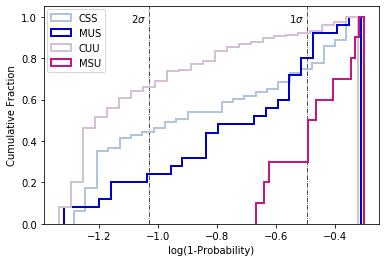

In [6]:
fig = plt.figure()
# plt.title('cumulative distribution of probabilities (log(1-p))', fontweight='bold')

p = []
r = classifier.predict_proba(features_test)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            p.append(np.log(1-r[i][0]))
        else:
            p.append(np.log(1-r[i][1]))
    else:
        if (classes_test[i] == 0):
            p.append(np.log10(1-r[i][1]))
        else:
            p.append(np.log10(1-r[i][0]))
              

                
cs = []
cu = []
ts = []   # misclassified unstable, actually stable
tu = []   # misclassified stable, actually unstable


# correct
inds = []

for i in range(0,len(classes_test)):
    if (classes_test[i] == classes_predict[i]):   # 0 = stable, 1 = unstable
        inds.append(i)

for i in range(0,len(r)):
    if (classes_test[i] == classes_predict[i]):
        if (classes_test[i] == 0):
            cs.append(np.log10(1-r[i][0]))
        else:
            cu.append(np.log10(1-r[i][1]))
            
            
# wrong
inds2 = []

for i in range(0,len(classes_test)):
    if (classes_test[i] != classes_predict[i]):
        inds2.append(i)

for i in range(0,len(r)):
    if (classes_test[i] != classes_predict[i]):
        if (classes_test[i] == 0):
            ts.append(np.log10(1-r[i][1]))
        else:
            tu.append(np.log10(1-r[i][0]))
                
                
                
n, bins, patches = plt.hist(cs, 25, density=True, linewidth=2, histtype='step', cumulative=True, label='CSS', color='lightsteelblue') #blue
n, bins, patches = plt.hist(ts, 25, density=True, linewidth=2, histtype='step', cumulative=True, label='MUS', color='mediumblue') #lavender
n, bins, patches = plt.hist(cu, 25, density=True, linewidth=2, histtype='step', cumulative=True, label='CUU', color='thistle') #green
n, bins, patches = plt.hist(tu, 25, density=True, linewidth=2, histtype='step', cumulative=True, label='MSU', color='mediumvioletred') #red
# n, bins, patches = plt.hist(p, 25, density=True, histtype='step', cumulative=True, label='all', color='black', linewidth=1.25)


# sigmas, log10(1-0.68) = -0.495, log10(1-0.95) = -1.031, log10(1-0.997) = -2.523
plt.axvline(x=-0.495, color='black', linestyle='-.', linewidth=0.7,zorder=0)
plt.axvline(x=-1.031, color='black', linestyle='-.', linewidth=0.7,zorder=0)
# plt.axvline(x=-2.523, color='black', linestyle='-.', linewidth=0.7)

plt.text(-0.505,0.975, r'$1\sigma$', ha='right')
plt.text(-1.041,0.975, r'$2\sigma$', ha='right')

plt.xlabel('log(1-Probability)')
plt.ylabel('Cumulative Fraction')

plt.legend(loc='best', borderaxespad=0.25)
plt.savefig('cumulative proba.pdf')

[(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (15, 1), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (15, 7), (15, 8), (15, 9), (15, 10), (17, 1), (17, 2), (17, 3), (17, 4), (17, 5), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (20, 1), (20, 2), (20, 3), (20, 4), (20, 5), (20, 6), (20, 7), (20, 8), (20, 9), (20, 10), (21, 1), (21, 2), (21, 3), (21, 4), (21, 5), (21, 6), (21, 7), (21, 8), (21, 9), (21, 10), (25, 1), (25, 2), (25, 3), (25, 4), (25, 5), (25, 6), (25, 7), (25, 8), (25, 9), (25, 10), (27, 1), (27, 2), (27, 3), (27, 4), (27, 5), (27, 6), (27, 7), (27, 8), (27, 9), (27, 10), (30, 1), (30, 2), (30, 3), (

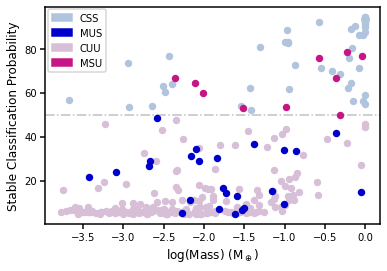

In [14]:

fate = []

for i in range(len(fa)):
    if (fa[i] == 'remaining'):
        fate.append(0)
    else:
        fate.append(1)
        
        
        
test_tup = [(ru[i], pl[i]) for i in range (len(ru))]
all_dict = {}
for i in range(len(ru)):
    tt = test_tup[i]
    all_dict[tt] = {}
    all_dict[tt]['outcome'] = classes_test[i]
    all_dict[tt]['predict'] = classes_predict[i]
    all_dict[tt]['end time'] = et[i]
    all_dict[tt]['type'] = 'test'
    
prob = classifier.predict_proba(features_test)

ps = 0; ms = 0

fig = plt.figure()
# plt.title('mass vs stable classification probability', fontweight='bold')
    
r = classifier.predict_proba(features_test)
    
for i in range(len(prob)):
    col = ''
    zord = 1
    run = ru[i]
    planet = pl[i]
    #print(run,planet)
    
    ps = r[i][0]
    pls = planets.query('run == @run & planet == @planet')
    #print(pls)
    
    if (all_dict[run, planet]['outcome'] == all_dict[run, planet]['predict']):
        if (all_dict[run, planet]['outcome'] == 0):
            col = 'lightsteelblue'; zord=1
        else:
            col = 'thistle';zord=0
    else:
        if (all_dict[run, planet]['outcome'] == 0):
            col = 'mediumblue'; zord=2
        else:
            col = 'mediumvioletred'; zord=2
    
    
    plt.scatter(pls['initial log mratio mm1'], ps*100, s=35, color=col, zorder = zord)
    
    
plt.axhline(y=50, ls='-.', c='silver', zorder = 0)    
plt.xlabel(r'log(Mass) (M$_\oplus$)')
plt.ylabel('Stable Classification Probability')

patch = mpatches.Patch(color='mediumblue', label='MUS')
patch2 = mpatches.Patch(color='lightsteelblue', label='CSS')
patch3 = mpatches.Patch(color='mediumvioletred', label='MSU')
patch4 = mpatches.Patch(color='thistle', label='CUU')

plt.legend(handles=[patch2, patch, patch4, patch3], loc='best', borderaxespad=0.25)  

plt.savefig('stable probability Earth mass.pdf')

/projects/opt/x86_64/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


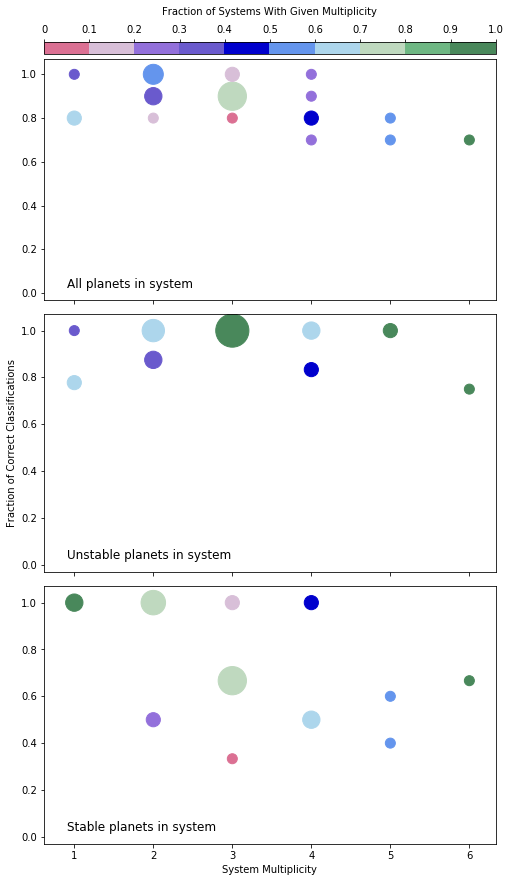

In [8]:
# want to color by vertical value for true multiplicity fraction. ex: 30 systems w/ final multiplicity of 3.
# of those, 9/30 are 10/10 correct classifications, 12/30 are 9/10 correct classifications, and 9/30 are 8/10
# correct classifications. color for each point is that ratio (9/30, 12/30, 9/30)

stable_correct = []
unstable_correct = []
multiplicity = []
correct = []
stable = []
unstable = []

for r in ru:
    mc = 0
    sc = 0
    uc = 0
    c = 0
    s = 0
    u = 0
    
    for p in range(1,11):
        if (all_dict[r, p]['predict'] == 0) and (all_dict[r, p]['outcome'] == 0):
            sc += 1
        if (all_dict[r, p]['outcome'] == 0):
            mc += 1
        if (all_dict[r, p]['predict'] == 1) and (all_dict[r, p]['outcome'] == 1):
            uc += 1
        if (all_dict[r, p]['predict'] == all_dict[r, p]['outcome']):
            c += 1
            
        if (all_dict[r, p]['outcome'] == 0):
            s += 1
        if (all_dict[r, p]['outcome'] == 1):
            u += 1
        if r==83: print(r,p,all_dict[r, p])
            
            
    stable_correct.append(sc)
    unstable_correct.append(uc)
    multiplicity.append(mc)
    correct.append(c)
    stable.append(s)
    unstable.append(u)
    
    

# We want to consider on a multiplicity-fraction basis instead of a point for each run

stable_correct=np.array(stable_correct)
unstable_correct=np.array(unstable_correct)
multiplicity=np.array(multiplicity)
correct=np.array(correct)
stable=np.array(stable)
unstable=np.array(unstable)
   
    
nsa=[];nss=[]; nsu=[]
# counters are our friends. Here, I make counters for each unique (fraction,multiplicity) pair aka each point on the plot
ca=Counter(list(zip(correct/10,multiplicity))); cs=Counter(list(zip(stable_correct/stable,multiplicity))); cu=Counter(list(zip(unstable_correct/unstable,multiplicity)))
cm=Counter(multiplicity)

xa=[];xs=[];xu=[] # mults
ya=[]; ys=[]; yu=[] #fracs
cola=[]; cols=[]; colu=[] # colors
sa=[]; ss=[]; su=[] # sizes

a=[ca,xa,ya,cola,sa]
s=[cs,xs,ys,cols,ss]
u=[cu,xu,yu,colu,su]

for myset in [a,s,u]:
    for i in list(myset[0].keys()): # do this for all planets
        myset[1]+=[i[1]]
        myset[2]+=[i[0]]
        myset[3]+=[myset[0][i]/cm[i[1]]] # color is how many things are in this bin/ how many things are in the column total
        myset[4]+=[myset[0][i]*10]# size is how many things thereare in the bin

x = np.linspace(0,1)
y = np.linspace(0,1)
XX, YY = np.meshgrid(x, y)
Z = np.sin(XX) * np.cos(YY)

cmap2 = colors.ListedColormap(['palevioletred', 'thistle', 'mediumpurple', 'slateblue', 'mediumblue', 'cornflowerblue', 
                              '#ADD6EC', '#BFD9BF', '#6EB783', '#49885B'])

boundaries = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
norm = colors.BoundaryNorm(boundaries, cmap2.N, clip=True)

fig, axs = plt.subplots(3, 1, figsize=(7,12), sharex=True,sharey=True)

# cmp='tab10'
# cmp = 'tab20b'
cmp = cmap2

axs[0].scatter(xa, ya, c=cola, s=sa, vmin=0,vmax=1,cmap=cmp, norm=norm)
axs[0].text(0.05,0.05,'All planets in system',transform=axs[0].transAxes,fontsize='large')

axs[2].scatter(xs, ys, c=cols, s=ss, vmin=0,vmax=1,cmap=cmp, norm=norm)
axs[2].text(0.05,0.05,'Stable planets in system',transform=axs[2].transAxes,fontsize='large')

cb=axs[1].scatter(xu, yu, c=colu, s=su, vmin=0,vmax=1,cmap=cmp, norm=norm)
axs[1].text(0.05,0.05,'Unstable planets in system',transform=axs[1].transAxes,fontsize='large')
   

# make a colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('top', size = '5%', pad = '2%')
fig.add_axes(cax)
cbar=fig.colorbar(cb, cax=cax, orientation="horizontal")
# cbar.set_ticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
# cbar.set_ticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

cbar.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
cbar.set_ticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

cbar.set_label('Fraction of Systems With Given Multiplicity',labelpad=10)
cax.xaxis.set_ticks_position('top')
cax.xaxis.set_label_position('top')

plt.tight_layout()
plt.subplots_adjust(top=0.96)
axs[0].set_ylim(-0.03,1.07)

# make pretty global axis labels
axall=fig.add_subplot(111, frameon=False)
axall.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
axall.set_xlabel('System Multiplicity')
axall.set_ylabel('Fraction of Correct Classifications')

plt.savefig('three panel vcustom.pdf', bbox_inches = "tight")

with 0 of top 3, average # of planets per 3-pl system correctly classified: 2.6153846153846154 . count:  65
with 1 of top 3, average # of planets per 3-pl system correctly classified: 2.6861313868613137 . count:  137
with 2 of top 3, average # of planets per 3-pl system correctly classified: 2.7837837837837838 . count:  37
with 3 of top 3, average # of planets per 3-pl system correctly classified: 2.0 . count:  1


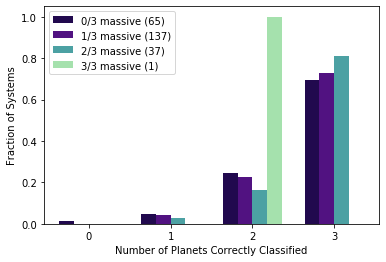

In [22]:
a0 = []
a1 = []
a2 = []
a3 = []

a0count = 0
a1count = 0
a2count = 0
a3count = 0


for rn in list(set(ru)):
    ms = []
    #print(planets.query('run == @rn')['initial log mratio mm1'])
    for p in range(1,11):
        pls = planets.query('run == @rn & planet == @p')
        if float(pls['initial log mratio mm1'])==0.: ms+=[3]
        elif float(pls['initial log mratio mm2'])==0.: ms+=[2]
        elif float(pls['initial log mratio mm3'])==0.: ms+=[1]
        else: ms+=[0]

    l = sorted(range(len(ms)), key=lambda x: ms[x])[-3:]
    
    
    flo = 1
    mid = 2
    ceil = 3
    
    while(ceil <= 10):
        gsa = 0
        
        if (flo in l) and (ceil in l) and (mid in l):
            if (all_dict[rn, flo]['outcome'] == all_dict[rn, flo]['predict']):
                gsa += 1
            if (all_dict[rn, ceil]['outcome'] == all_dict[rn, ceil]['predict']):
                gsa += 1
            if (all_dict[rn, mid]['outcome'] == all_dict[rn, mid]['predict']):
                gsa += 1
            a3.append(gsa)
            a3count+=1
        
        elif ((flo in l) and (ceil in l)) or ((flo in l) and (mid in l)) or ((mid in l) and (ceil in l)):
            if (all_dict[rn, flo]['outcome'] == all_dict[rn, flo]['predict']):
                gsa += 1
            if (all_dict[rn, ceil]['outcome'] == all_dict[rn, ceil]['predict']):
                gsa += 1
            if (all_dict[rn, mid]['outcome'] == all_dict[rn, mid]['predict']):
                gsa += 1
            a2.append(gsa)
            a2count+= 1
            
        elif (flo not in l) and (ceil not in l) and (mid not in l):
            if (all_dict[rn, flo]['outcome'] == all_dict[rn, flo]['predict']):
                gsa += 1
            if (all_dict[rn, ceil]['outcome'] == all_dict[rn, ceil]['predict']):
                gsa += 1
            if (all_dict[rn, mid]['outcome'] == all_dict[rn, mid]['predict']):
                gsa += 1
            a0.append(gsa)
            a0count+=1
            
        else:
            if (all_dict[rn, flo]['outcome'] == all_dict[rn, flo]['predict']):
                gsa += 1
            if (all_dict[rn, ceil]['outcome'] == all_dict[rn, ceil]['predict']):
                gsa += 1
            if (all_dict[rn, mid]['outcome'] == all_dict[rn, mid]['predict']):
                gsa += 1
            a1.append(gsa)
            a1count+=1
            
        ceil += 1; mid += 1; flo += 1
    

print('with 0 of top 3, average # of planets per 3-pl system correctly classified:', np.average(a0), '. count: ', a0count)
print('with 1 of top 3, average # of planets per 3-pl system correctly classified:', np.average(a1), '. count: ', a1count)
print('with 2 of top 3, average # of planets per 3-pl system correctly classified:', np.average(a2), '. count: ', a2count)
print('with 3 of top 3, average # of planets per 3-pl system correctly classified:', np.average(a3), '. count: ', a3count)

aa = [a0,a1,a2,a3]
ns=[0,1,2,3]
aouts=[[],[],[],[]]

for i in range(len(aa)):
    count=Counter(aa[i])
    n = [count[nn]/len(aa[i]) for nn in ns]
    aouts[i]=n
a0vals=aouts[0]; a1vals=aouts[1]; a2vals=aouts[2]; a3vals=aouts[3]
    
# print(aouts)
#a0vals = [0.01276595744680851, 0.05531914893617021, 0.22127659574468084, 0.7106382978723405]
#a1vals = [0.004662004662004662, 0.03496503496503497, 0.2540792540792541, 0.7062937062937062]
#a2vals = [0.0, 0.031007751937984496, 0.27906976744186046, 0.689922480620155]
#a3vals = [0.0, 0.0, 0.2857142857142857, 0.7142857142857143]

x = ['0','1','2','3']

x = np.arange(len(x))  # the label locations
width = 0.18  # the width of the bars

fig, ax = plt.subplots()
recta0 = ax.bar(x - width*3/2, a0vals, width, color='#21094E', label='0/3 massive ('+str(a0count)+')')
recta1 = ax.bar(x - width/2, a1vals, width, color='#511281', label='1/3 massive ('+str(a1count)+')')
recta2 = ax.bar(x + width/2, a2vals, width, color='#4CA1A3', label='2/3 massive ('+str(a2count)+')')
recta3 = ax.bar(x + width*3/2, a3vals, width, color='#A5E1AD', label='3/3 massive ('+str(a3count)+')')

ax.set_xlabel('Number of Planets Correctly Classified')
ax.set_ylabel('Fraction of Systems')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.savefig('3 planet systems bar.pdf', bbox_inches = 'tight')

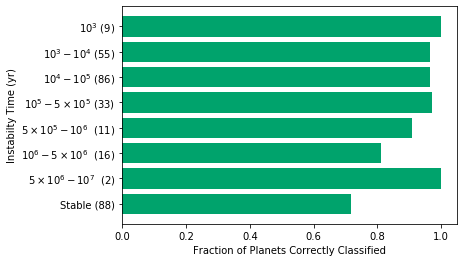

In [23]:
b1000c = 0
b10000c = 0
b100000c = 0
b500000c = 0
b1Mc = 0
b5Mc = 0
b10Mc = 0
bstablec = 0

b1000t = 0
b10000t = 0
b100000t = 0
b500000t = 0
b1Mt = 0
b5Mt = 0
b10Mt = 0
bstablet = 0

for r in list(set(ru)):
    for p in range(1,11):
        if (all_dict[r,p]['end time'] <= 1000):
            b1000t += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                b1000c += 1
        elif (all_dict[r,p]['end time'] <= 10000):
            b10000t += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                b10000c += 1
        elif (all_dict[r,p]['end time'] <= 100000):
            b100000t += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                b100000c += 1
        elif (all_dict[r,p]['end time'] <= 500000):
            b500000t += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                b500000c += 1
        elif (all_dict[r,p]['end time'] <= 1000000):
            b1Mt += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                b1Mc += 1
        elif (all_dict[r,p]['end time'] <= 5000000):
            b5Mt += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                b5Mc += 1
        elif (all_dict[r,p]['end time'] < 10000000):
            b10Mt += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                b10Mc += 1
        elif (all_dict[r,p]['end time'] == 10000000):
            bstablet += 1
            if (all_dict[r,p]['predict'] == all_dict[r,p]['outcome']):
                bstablec += 1
                

fracx = [b1000c/b1000t, b10000c/b10000t, b100000c/b100000t, b500000c/b500000t, 
         b1Mc/b1Mt, b5Mc/b5Mt, b10Mc/b10Mt, bstablec/bstablet]

times = [r'$10^3$ (' +str(b1000t)+')', 
         r'$10^3-10^4$ ('+str(b10000t)+')', r'$10^4-10^5$ ('+str(b100000t)+')', 
         r'$10^5-5\times 10^5$ ('+str(b500000t)+')', r'$5\times 10^5-10^6$  ('+str(b1Mt)+')',
             r'$10^6-5\times 10^6$  ('+str(b5Mt)+')', r'$5\times 10^6-10^7$  ('+str(b10Mt)+')', 'Stable ('+str(bstablet)+')']


fig = plt.figure()
# plt.title('accuracy by instability time', fontweight='bold')

plt.barh(times[::-1], fracx[::-1], color='#00A36C') #028A0F')
plt.ylabel('Instabilty Time (yr)')
plt.xlabel('Fraction of Planets Correctly Classified')

plt.savefig('instability vs accuracy.pdf', bbox_inches = "tight")

30
30 1 21.26502637150397
30 2 11.624101949329638
30 3 30.61416544026761
30 4 23.377721352322325
30 5 11.504733082648729
30 6 51.32321625998517
30 7 37.66047883598713
30 8 10.719100017470495
30 9 10.338164219470702
30 10 50.24867903682199


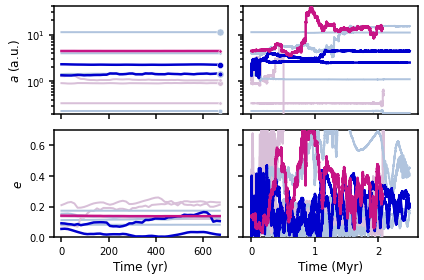

In [16]:
# test_runs=[3, 5, 6, 11, 14, 15, 17, 20, 21, 25, 27, 30, 36, 38, 42, 44, 48, 54, 55, 61, 64, 71, 72, 77, 81, 82, 86, 96, 97, 98]
test_runs=[30]
pred = classifier.predict_proba(features_test)
for run in test_runs:
    print(run)
    data={}
    cd={}
    data[run]={}
    cd[run]={}
    for planet in range(1,11):
        pl = genfromtxt(r'/Users/rsmullen/Outreach/Exoplanets_with_Neha_2020/all_mor/run'+str(run)+'/PL'+str(planet)+'.el',skip_header=2,usecols=(0,2,3,1))
        data[run][planet]=pl
        if all_dict[run,planet]['predict'] == 0:
            if all_dict[run,planet]['outcome']==0: cd[run][planet]='css'
            else: cd[run][planet]='msu'
        else:
            if all_dict[run,planet]['outcome']==1: cd[run][planet]='cuu'
            else: cd[run][planet]='mus'

    cdict={'css':['lightsteelblue',1,2],'cuu':['thistle',1,2],'msu':['mediumvioletred',1,2.5],'mus':['mediumblue',1,2.5]}


    f,ax=plt.subplots(nrows=2,ncols=2)
    ax=np.ravel(ax)
    for planet in range(1,11):
        pl = data[run][planet]
        c=cdict[cd[run][planet]][0]
        alph=cdict[cd[run][planet]][1]
        lw=cdict[cd[run][planet]][2]
        ind=50
        ind2=182626
        
        ax[0].semilogy(pl[:ind,0],pl[:ind,1],color=c,lw=lw,alpha=alph,zorder=lw**2)
        ax[1].semilogy(pl[:ind2,0]/1E6,pl[:ind2,1],color=c,lw=lw,alpha=alph,zorder=lw**2)
        ax[2].plot(pl[:ind,0],pl[:ind,2],color=c,lw=lw,alpha=alph,zorder=lw**2)
        ax[3].plot(pl[:ind2,0]/1E6,pl[:ind2,2],color=c,lw=lw,alpha=alph,zorder=lw**2)
        try:
            ss=(log10(pl[ind-1,3]/3E-6)+2)**3
            ax[0].scatter(pl[ind-1,0],pl[ind-1,1],s=ss,color=c,edgecolor='w',lw=0.5,zorder=100+lw)
        except:
            ss=(log10(pl[-1,3]/3E-6)+2)**3
            ax[0].scatter(pl[-1,0],pl[-1,1],s=ss,color=c,edgecolor='w',lw=0.5,zorder=100+lw)
        print(run,planet,ss)
#     ax[1].set_xlim(0,.25)
#     ax[3].set_xlim(0,.25)
#     ax[0].sharey(ax[1])
#     ax[0].sharex(ax[2])
#     ax[2].sharey(ax[3])
#     ax[1].sharex(ax[3])
       
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[0].set_ylim(.2,40)
    ax[1].set_ylim(.2,40)
    ax[2].set_ylim(0,.7)
    ax[3].set_ylim(0,.7)
    ax[0].set_ylabel(r'$a$ (a.u.)')
    ax[2].set_ylabel(r'$e$')
    ax[2].set_xlabel(r'Time (yr)')
    ax[3].set_xlabel(r'Time (Myr)')
    plt.tight_layout()
    plt.savefig('sys'+str(run)+'.pdf')

